# Random Forest

## ie11

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [12]:
print(digits.data[0])
print(digits.images[0])
print(digits.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


<Figure size 432x288 with 0 Axes>

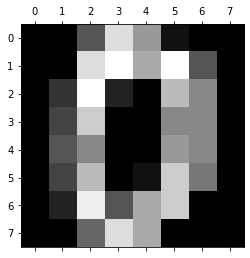

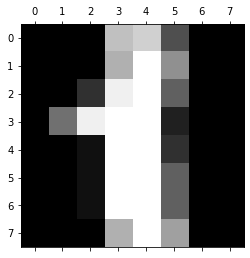

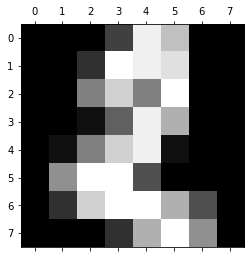

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [22]:
print(type(digits.data))
df = pd.DataFrame(digits.data)
df.head()

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [24]:
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [30]:
x = df.drop(["target"], axis="columns")
y = df.target
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=23)
print(len(x_test))
print(x_test.head())

450
       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
1754  0.0  0.0   0.0   0.0  13.0   8.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
880   0.0  0.0   0.0   7.0  13.0   2.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
25    0.0  0.0  12.0   8.0   8.0   7.0  0.0  0.0  0.0  3.0  ...  0.0  0.0   
1067  0.0  1.0  13.0  14.0   2.0   0.0  0.0  0.0  0.0  7.0  ...  2.0  0.0   
176   0.0  7.0  16.0  16.0  16.0  11.0  2.0  0.0  0.0  5.0  ...  0.0  0.0   

       56   57    58    59    60    61   62   63  
1754  0.0  0.0   0.0   0.0  15.0   7.0  0.0  0.0  
880   0.0  0.0   0.0   6.0  14.0  14.0  1.0  0.0  
25    0.0  0.0  11.0  14.0   9.0   0.0  0.0  0.0  
1067  0.0  1.0  12.0  14.0  13.0   6.0  0.0  0.0  
176   0.0  4.0  15.0  16.0   6.0   0.0  0.0  0.0  

[5 rows x 64 columns]


In [44]:
from sklearn.ensemble import RandomForestClassifier as rfc
model = rfc(n_estimators=3000)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9822222222222222

In [45]:
y_predicted = model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 44,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 53]], dtype=int64)

Text(69.0, 0.5, 'Actual')

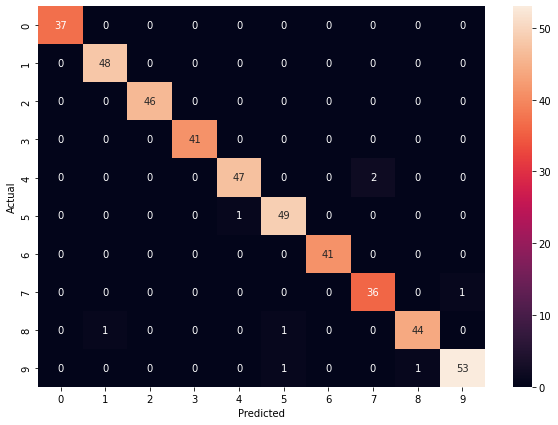

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## asgn11

In [106]:
from sklearn import datasets
iris = datasets.load_iris()
dir(iris)

numpy.ndarray

In [104]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [70]:
x = iris.data
y = iris.target
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=23)
print(len(x_test))
print(x_test)

38
[[6.9 3.1 5.4 2.1]
 [7.2 3.2 6.  1.8]
 [5.8 2.7 4.1 1. ]
 [4.6 3.1 1.5 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 4.9 1.5]
 [5.7 3.8 1.7 0.3]
 [6.4 3.1 5.5 1.8]
 [5.4 3.4 1.7 0.2]
 [5.6 2.9 3.6 1.3]
 [6.1 2.8 4.7 1.2]
 [4.8 3.1 1.6 0.2]
 [7.1 3.  5.9 2.1]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 3.2 4.5 1.5]
 [6.1 2.9 4.7 1.4]
 [7.7 3.  6.1 2.3]
 [5.2 3.4 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.7 3.2 1.3 0.2]
 [6.7 3.1 5.6 2.4]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.9 0.4]
 [6.2 2.8 4.8 1.8]
 [6.6 3.  4.4 1.4]
 [5.6 2.5 3.9 1.1]
 [4.9 3.1 1.5 0.1]
 [5.2 2.7 3.9 1.4]
 [5.4 3.9 1.3 0.4]
 [7.7 2.8 6.7 2. ]
 [5.  3.4 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [6.5 2.8 4.6 1.5]
 [5.  2.3 3.3 1. ]]


In [86]:
from sklearn.ensemble import RandomForestClassifier as rfc
model = rfc(n_estimators=100, random_state=23)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9736842105263158